# Heart Attack Prediction

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
from sklearn.metrics import jaccard_score, log_loss, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

About this dataset
Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type

    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach : maximum heart rate achieved

* target : 0= less chance of heart attack 1= more chance of heart attack

### EDA/DataAnalysis

In [2]:
df = pd.read_csv("C:\\Users\\Fateme\\Downloads\\git\\Parkinson Disease\\heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Visualization

In [8]:
corr = df.corr()

<AxesSubplot:>

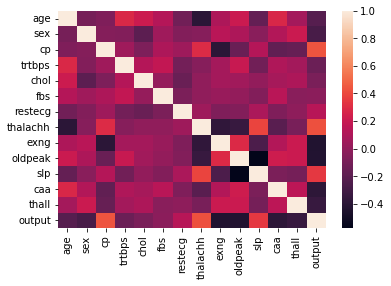

In [9]:
sns.heatmap(corr)

In [10]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

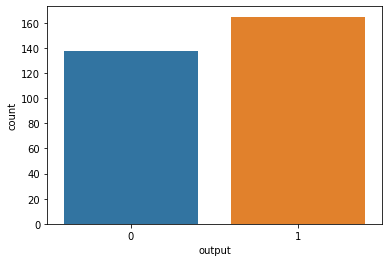

In [11]:
sns.countplot(x='output', data=df)

In [12]:
sns.set(rc={'figure.figsize':(15,8)})

<AxesSubplot:xlabel='age', ylabel='output'>

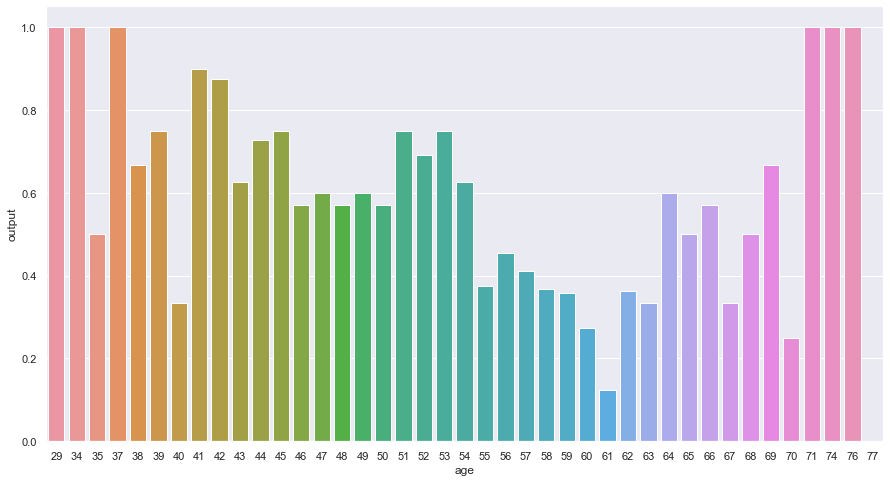

In [13]:
sns.barplot(x='age', y='output', data=df, ci=None)

<AxesSubplot:xlabel='age', ylabel='count'>

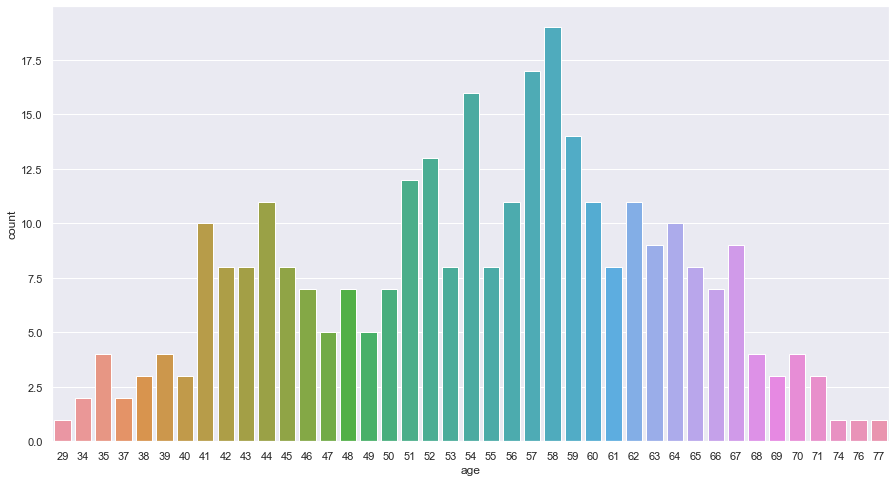

In [70]:
sns.countplot(x='age',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

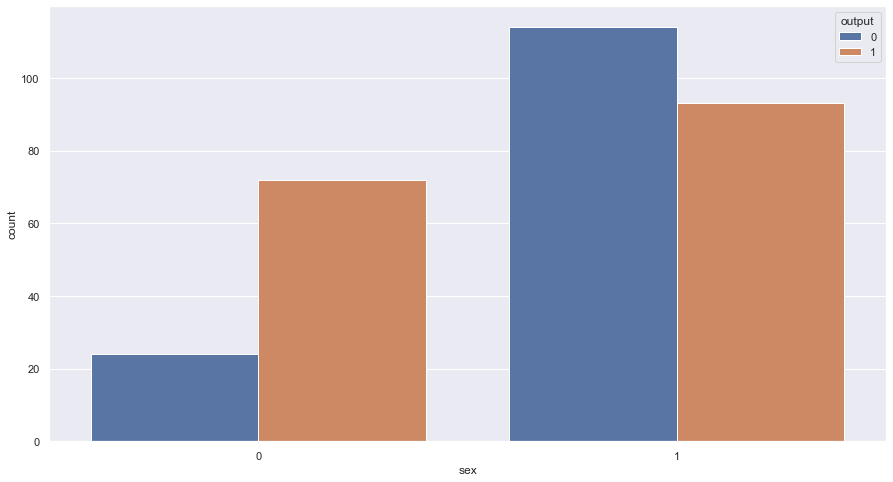

In [14]:
sns.countplot(x='sex', data=df, hue='output')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

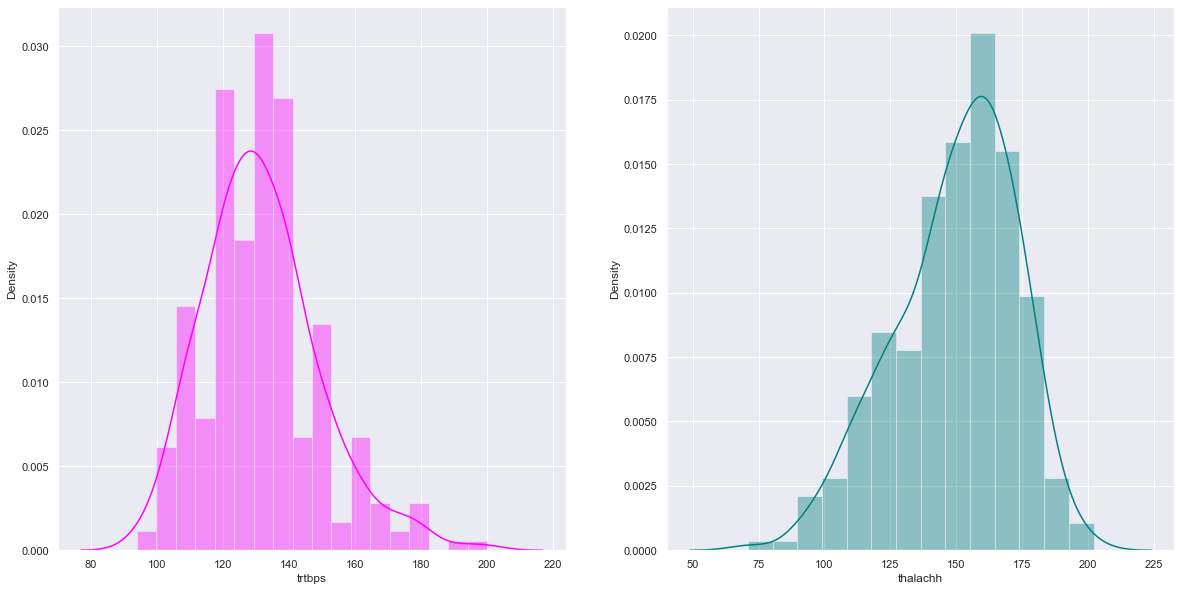

In [71]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

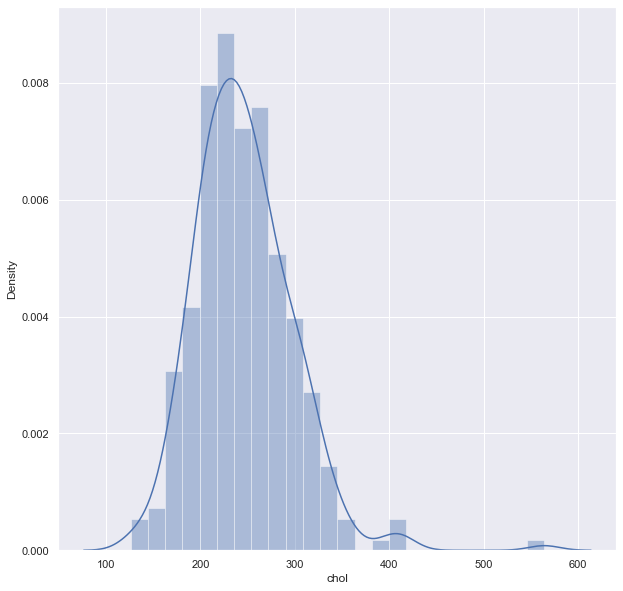

In [73]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True)

### train test split

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('output', axis=1)

In [19]:
Y = df['output']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.25)

# Logestic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
log_pred = lr.predict(X_test)

## Evaluation

In [25]:
lr.score(X_test,Y_test)

0.9210526315789473

In [27]:
accuracy_score(Y_test, log_pred)

0.9210526315789473

In [28]:
print(log_loss(Y_test, log_pred))
print(jaccard_score(Y_test, log_pred))
print(f1_score(Y_test, log_pred))

2.726808630974281
0.8695652173913043
0.9302325581395349


In [29]:
print(confusion_matrix(Y_test, log_pred))

[[30  6]
 [ 0 40]]


In [30]:
print(classification_report(Y_test, log_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        36
           1       0.87      1.00      0.93        40

    accuracy                           0.92        76
   macro avg       0.93      0.92      0.92        76
weighted avg       0.93      0.92      0.92        76



# SVM

In [31]:
from sklearn.svm import SVC

In [32]:
svm = SVC()

In [36]:
svm.fit(X_train, Y_train)

SVC()

In [37]:
svm_pred = svm.predict(X_test)

## Evaluation

In [76]:
svm.score(X_test,Y_test)

0.6842105263157895

In [38]:
accuracy_score(Y_test, svm_pred)

0.6842105263157895

In [39]:
print(log_loss(Y_test, svm_pred))
print(jaccard_score(Y_test, svm_pred))
print(f1_score(Y_test, svm_pred))

10.90718191880303
0.5932203389830508
0.7446808510638299


In [40]:
print(confusion_matrix(Y_test, svm_pred))

[[17 19]
 [ 5 35]]


In [41]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.65      0.88      0.74        40

    accuracy                           0.68        76
   macro avg       0.71      0.67      0.67        76
weighted avg       0.71      0.68      0.67        76



# Desision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
Dtree = DecisionTreeClassifier()

In [44]:
parameterdt = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [45]:
gridtree = GridSearchCV(Dtree, parameterdt, cv=10)

In [46]:
treecv = gridtree.fit(X_train, Y_train)

In [47]:
print('best parameter: ', treecv.best_params_)
print('best score: ', treecv.best_score_)

best parameter:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
best score:  0.7924901185770751


In [48]:
tree_pred = treecv.predict(X_test)

## Evaluation

In [49]:
treecv.score(X_test, Y_test)

0.8026315789473685

In [77]:
accuracy_score(Y_test, tree_pred)

0.8026315789473685

In [50]:
print(log_loss(Y_test, tree_pred))
print(jaccard_score(Y_test, tree_pred))
print(f1_score(Y_test, tree_pred))

6.816979493360426
0.7058823529411765
0.8275862068965516


In [51]:
print(confusion_matrix(Y_test, tree_pred))

[[25 11]
 [ 4 36]]


In [52]:
print(classification_report(Y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        36
           1       0.77      0.90      0.83        40

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
KNN = KNeighborsClassifier()

In [55]:
knnparameter = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p':[1,2]}

In [56]:
knngridsearch = GridSearchCV(KNN, knnparameter, cv=10)

In [57]:
knncv = knngridsearch.fit(X_train, Y_train)

In [58]:
print('best paramete is: ', knncv.best_params_)
print('accuracy: ', knncv.best_score_)

best paramete is:  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1}
accuracy:  0.6375494071146244


In [59]:
knn_pred = knncv.predict(X_test)

## Evaluation

In [60]:
knncv.score(X_test, Y_test)

0.7763157894736842

In [78]:
accuracy_score(Y_test, knn_pred)

0.7763157894736842

In [61]:
print(log_loss(Y_test, knn_pred))
print(jaccard_score(Y_test, knn_pred))
print(f1_score(Y_test, knn_pred))

7.725926224704005
0.6851851851851852
0.8131868131868133


In [62]:
print(confusion_matrix(Y_test, tree_pred))

[[25 11]
 [ 4 36]]


In [63]:
print(classification_report(Y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        36
           1       0.77      0.90      0.83        40

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



# Conclusion

In [79]:
result = pd.DataFrame({'Model':['LogesticRegression','KNN', 'Decision tree', 'SVC'],
                     'Score':[lr.score(X_test, Y_test),knncv.score(X_test, Y_test), knncv.score(X_test, Y_test),svm.score(X_test, Y_test)]})

In [80]:
result

,Model,Score
0,LogesticRegression,0.921053
1,KNN,0.776316
2,Decision tree,0.776316
3,SVC,0.684211


##  so LogesticRegression is the best model for our dataset.